In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

A railroad numbers its locomotives in order 1..N. One day you see a locomotive with the number 60. Estimate how many locomotives the railroad has.

In [83]:
data = 60, 30, 90,
steps = 500, 1000, 2000,
result = {}

for s in steps:
    hypos = np.arange(1, s+1, 1)
    # init_prior = np.ones(hypos.shape) / hypos.shape[0]  # uniform
    init_prior = hypos**(-1.0)  # power law
    prior = init_prior.copy()
    for d in data:
        likelihood = 1 / hypos
        likelihood[d>hypos] = 0  # data
        posterior = prior * likelihood
        prior = posterior
    posterior /= posterior.sum()

    result[s] = (posterior * hypos).sum()

133.99746308073125


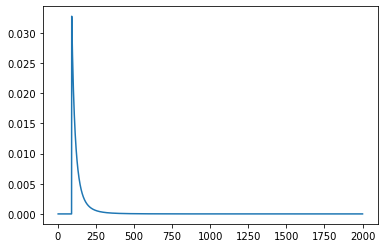

In [88]:
result
plt.plot(hypos, posterior, label='uniform prior')
# plt.plot(hypos, init_prior)
print((hypos * posterior).sum())